<a href="https://colab.research.google.com/github/bmurmann/skywater-pdk-sky130-raw-data/blob/main/notebooks/sky130_plot_gm_pmos_debug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKY130 plots of PMOS IV data (standard Vt) for BSIM model debug


Boris Murmann, June 2024<br>
SPDX-License-Identifier: Apache-2.0


## Get data

In [124]:
!git clone https://github.com/google/skywater-pdk-sky130-raw-data

fatal: destination path 'skywater-pdk-sky130-raw-data' already exists and is not an empty directory.


## Install DeviceModelingToolkit

[DeviceModelingToolkit](https://pypi.org/project/DMT-core/) (DMT) is a Python tool targeted at helping modeling engineers extract model parameters, run circuit and TCAD simulations and automate their infrastructure.


In [125]:
!python3 -m pip install DMT-core

## Read measurement data

In [126]:
import pathlib
import pandas as pd
import DMT.core
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# DMT seems to mess with matplot lib by requiring latex
# do not use latex for font rendering
mpl.rcParams['text.usetex'] = False

cells_dir = pathlib.Path('skywater-pdk-sky130-raw-data/sky130_fd_pr/cells')
mdm_path_list = [
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8397_8_7_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8404_10_9_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8404_11_10_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8404_12_11_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8405_4_3_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8405_5_4_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8405_6_5_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_10_9_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_11_10_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_12_11_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_4_3_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_5_4_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_6_5_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_7_6_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_8_7_IDVG).mdm',
    cells_dir/ 'pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_9_8_IDVG).mdm'
]

dx = 50e-3;
for num, name in enumerate(mdm_path_list):
    print("Dataset {}: {}".format(num+1, name))
    mdm_path = mdm_path_list[num]
    measurement = DMT.core.DutMeas(
        database_dir=None,
        dut_type=DMT.core.DutType.device,
        name=mdm_path.stem,
        reference_node='E')
    measurement.add_data(pathlib.Path(mdm_path), key=mdm_path.stem)
    df_temp = measurement.data[mdm_path.stem]
    #select data at maximum VD and zero VB
    df_temp = df_temp[np.isclose(df_temp['VD'], -1.8)]
    df_temp = df_temp[np.isclose(df_temp['VB'], 0)]
    # discard unneccesary columns
    if num==0:
        df = -df_temp[['VG']].copy()
    df.insert(1+num, "ID"+str(num), -df_temp[['ID']])
df.columns = [str(x) for x in range(0,17)]
df

Dataset 1: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8397_8_7_IDVG).mdm
Dataset 2: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8404_10_9_IDVG).mdm
Dataset 3: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8404_11_10_IDVG).mdm
Dataset 4: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8404_12_11_IDVG).mdm
Dataset 5: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8405_4_3_IDVG).mdm
Dataset 6: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8405_5_4_IDVG).mdm
Dataset 7: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8405_6_5_IDVG).mdm
Dataset 8: skywater-pdk-sky130-raw-data/sky130_fd_pr/cells/pfet_01v8/sky130_fd_pr__pfet_01v8_w7u_l0p15u_m1(8413_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
37,-0.00,-7.219000e-10,-9.012000e-10,1.003500e-09,-2.902000e-10,-8.987000e-10,-1.014300e-09,9.239000e-10,-8.836000e-10,8.915000e-10,-8.147000e-10,1.103300e-09,9.783000e-10,1.915000e-09,6.594000e-10,1.367100e-09,1.110200e-09
38,0.05,-4.390000e-11,-2.291600e-09,2.275500e-09,5.420000e-10,-2.201900e-09,-2.219600e-09,1.544600e-09,-2.309800e-09,1.378500e-09,-2.365000e-09,1.187300e-09,2.210300e-09,2.263400e-09,-3.750000e-11,2.109400e-09,1.999800e-09
39,0.10,4.595000e-10,-2.332900e-09,1.589400e-09,-2.199100e-09,-2.263300e-09,-1.114400e-09,2.659200e-09,-2.347400e-09,2.278500e-09,-2.318500e-09,-2.270400e-09,1.683300e-09,1.618300e-09,-1.660000e-10,2.203400e-09,2.139400e-09
40,0.15,2.502900e-09,-2.323100e-09,-2.296500e-09,-1.883300e-09,-2.239100e-09,1.670300e-09,3.072400e-09,-2.320800e-09,1.513800e-09,-2.214800e-09,-1.585300e-09,-2.293400e-09,-2.210200e-09,1.298600e-09,1.375700e-09,2.262600e-09
41,0.20,6.939200e-09,-2.249100e-09,-2.323500e-09,-7.657000e-10,-1.144300e-09,3.018500e-09,5.721000e-09,-1.478800e-09,-2.179300e-09,-1.765100e-09,-1.591000e-10,-1.306000e-09,-9.517000e-10,1.740000e-09,2.130000e-11,1.537500e-09
42,0.25,1.648000e-08,-1.617100e-09,-2.259900e-09,1.432700e-09,1.762500e-09,6.478200e-09,1.914700e-08,1.386500e-09,-2.120400e-09,1.539500e-09,2.781000e-09,1.678700e-09,1.995900e-09,-1.613300e-09,-2.197200e-09,-1.693700e-09
43,0.30,4.413400e-08,1.305700e-09,-1.296200e-09,3.345100e-09,3.734400e-09,2.194500e-08,5.739600e-08,2.974000e-09,-6.321000e-10,2.586400e-09,3.473300e-09,2.806600e-09,5.219600e-09,1.989100e-09,-8.464000e-10,2.202100e-09
44,0.35,1.081630e-07,2.955900e-09,1.804500e-09,6.196800e-09,1.124000e-08,6.309600e-08,1.682700e-07,5.210500e-09,2.138200e-09,2.612100e-09,7.058400e-09,6.174600e-09,1.103200e-08,4.460300e-09,2.547900e-09,5.757000e-09
45,0.40,2.452800e-07,4.320600e-09,4.076300e-09,1.236800e-08,3.438200e-08,1.789300e-07,4.541900e-07,1.045400e-08,6.681800e-09,3.385400e-09,2.318600e-08,2.124100e-08,3.587000e-08,1.223100e-08,6.190300e-09,1.398200e-08
46,0.45,5.496000e-07,1.136100e-08,1.342000e-08,4.213900e-08,1.073800e-07,4.891100e-07,1.124000e-06,3.227900e-08,2.263300e-08,1.461600e-08,7.151100e-08,6.514700e-08,1.071650e-07,3.918000e-08,1.926300e-08,4.867200e-08


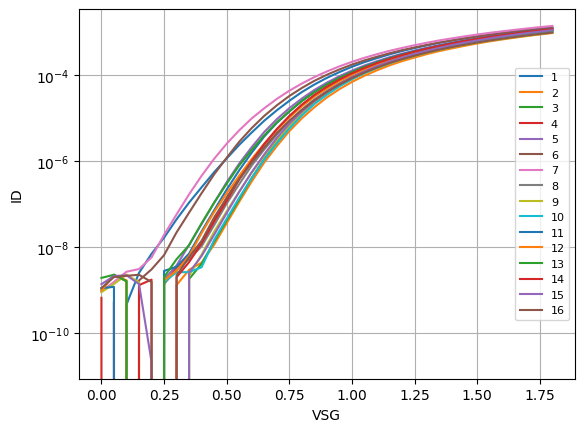

In [127]:
df.plot(x='0', logy=True).legend(loc='right', fontsize=8)
plt.xlabel('VSG')
plt.ylabel('ID')
plt.grid()
plt.show()

In [128]:
dx = 0.05
df_gm = df.copy()
df_gm = df_gm.diff(1)/dx
df_gm['0'] = df['0']
df_gm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
37,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,0.05,1.356000e-08,-2.780800e-08,2.544000e-08,1.664400e-08,-2.606400e-08,-2.410600e-08,1.241400e-08,-2.852400e-08,9.740000e-09,-3.100600e-08,1.680000e-09,2.464000e-08,6.968000e-09,-1.393800e-08,1.484600e-08,1.779200e-08
39,0.10,1.006800e-08,-8.260000e-10,-1.372200e-08,-5.482200e-08,-1.228000e-09,2.210400e-08,2.229200e-08,-7.520000e-10,1.800000e-08,9.300000e-10,-6.915400e-08,-1.054000e-08,-1.290200e-08,-2.570000e-09,1.880000e-09,2.792000e-09
40,0.15,4.086800e-08,1.960000e-10,-7.771800e-08,6.316000e-09,4.840000e-10,5.569400e-08,8.264000e-09,5.320000e-10,-1.529400e-08,2.074000e-09,1.370200e-08,-7.953400e-08,-7.657000e-08,2.929200e-08,-1.655400e-08,2.464000e-09
41,0.20,8.872600e-08,1.480000e-09,-5.400000e-10,2.235200e-08,2.189600e-08,2.696400e-08,5.297200e-08,1.684000e-08,-7.386200e-08,8.994000e-09,2.852400e-08,1.974800e-08,2.517000e-08,8.828000e-09,-2.708800e-08,-1.450200e-08
42,0.25,1.908160e-07,1.264000e-08,1.272000e-09,4.396800e-08,5.813600e-08,6.919400e-08,2.685200e-07,5.730600e-08,1.178000e-09,6.609200e-08,5.880200e-08,5.969400e-08,5.895200e-08,-6.706600e-08,-4.437000e-08,-6.462400e-08
43,0.30,5.530800e-07,5.845600e-08,1.927400e-08,3.824800e-08,3.943800e-08,3.093360e-07,7.649800e-07,3.175000e-08,2.976600e-08,2.093800e-08,1.384600e-08,2.255800e-08,6.447400e-08,7.204800e-08,2.701600e-08,7.791600e-08
44,0.35,1.280580e-06,3.300400e-08,6.201400e-08,5.703400e-08,1.501120e-07,8.230200e-07,2.217480e-06,4.473000e-08,5.540600e-08,5.140000e-10,7.170200e-08,6.736000e-08,1.162480e-07,4.942400e-08,6.788600e-08,7.109800e-08
45,0.40,2.742340e-06,2.729400e-08,4.543600e-08,1.234240e-07,4.628400e-07,2.316680e-06,5.718400e-06,1.048700e-07,9.087200e-08,1.546600e-08,3.225520e-07,3.013280e-07,4.967600e-07,1.554140e-07,7.284800e-08,1.645000e-07
46,0.45,6.086400e-06,1.408080e-07,1.868740e-07,5.954200e-07,1.459960e-06,6.203600e-06,1.339620e-05,4.365000e-07,3.190240e-07,2.246120e-07,9.665000e-07,8.781200e-07,1.425900e-06,5.389800e-07,2.614540e-07,6.938000e-07


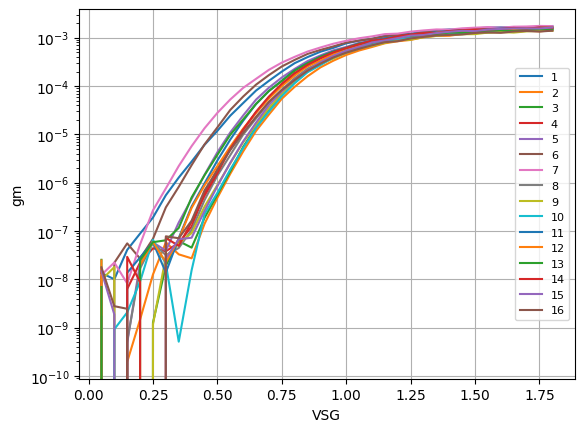

In [129]:
df_gm.plot(x='0', logy=True).legend(loc='right', fontsize=8)
plt.xlabel('VSG')
plt.ylabel('gm')
plt.grid()
plt.show()

In [130]:
df_gm_ID = df.copy()
df_gm_ID = df_gm_ID.apply(np.log).diff(1)/dx
df_gm_ID['0'] = df['0']
df_gm_ID

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
37,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,0.05,NaN,NaN,16.374118,NaN,NaN,NaN,10.278328,NaN,8.716916,NaN,1.467523,16.301343,3.343010,NaN,8.674237,11.770140
39,0.10,NaN,NaN,-7.176864,NaN,NaN,NaN,10.865207,NaN,10.050428,NaN,NaN,-5.447442,-6.709838,NaN,0.871962,1.349565
40,0.15,33.901328,NaN,NaN,NaN,NaN,NaN,2.888674,NaN,-8.177886,NaN,NaN,NaN,NaN,NaN,-9.420779,1.119784
41,0.20,20.394729,NaN,NaN,NaN,NaN,11.835135,12.433692,NaN,NaN,NaN,NaN,NaN,NaN,5.851967,-83.360218,-7.727137
42,0.25,17.299221,NaN,NaN,NaN,NaN,15.273653,24.160049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,0.30,19.701659,NaN,NaN,16.958716,15.017078,24.401933,21.956571,15.262505,NaN,10.376185,4.445892,10.279082,19.226514,NaN,NaN,NaN
44,0.35,17.928178,16.341278,NaN,12.330729,22.037834,21.122361,21.511904,11.215359,NaN,0.197751,14.182265,15.769406,14.967587,16.150675,NaN,19.220101
45,0.40,16.375221,7.591822,16.298123,13.821589,22.361087,20.846746,19.858916,13.926177,22.788461,5.186351,23.786605,24.709783,23.582023,20.175154,17.754281,17.747086
46,0.45,16.135807,19.335843,23.831128,24.517224,22.776815,20.111855,18.122668,22.548644,24.400432,29.252895,22.526053,22.414260,21.889368,23.283854,22.704052,24.946663


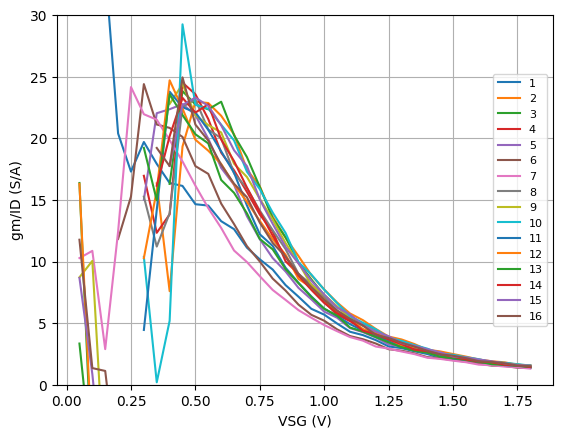

In [131]:
df_gm_ID.plot(x='0').legend(loc='right', fontsize=8)
plt.ylim(0, 30)
plt.xlabel('VSG (V)')
plt.ylabel('gm/ID (S/A)')
plt.grid()
plt.show()

In [132]:
print(df_gm_ID)

       0          1          2          3          4          5          6  \
37 -0.00        NaN        NaN        NaN        NaN        NaN        NaN   
38  0.05        NaN        NaN  16.374118        NaN        NaN        NaN   
39  0.10        NaN        NaN  -7.176864        NaN        NaN        NaN   
40  0.15  33.901328        NaN        NaN        NaN        NaN        NaN   
41  0.20  20.394729        NaN        NaN        NaN        NaN  11.835135   
42  0.25  17.299221        NaN        NaN        NaN        NaN  15.273653   
43  0.30  19.701659        NaN        NaN  16.958716  15.017078  24.401933   
44  0.35  17.928178  16.341278        NaN  12.330729  22.037834  21.122361   
45  0.40  16.375221   7.591822  16.298123  13.821589  22.361087  20.846746   
46  0.45  16.135807  19.335843  23.831128  24.517224  22.776815  20.111855   
47  0.50  14.651416  22.966958  22.756947  23.578685  21.891372  17.745414   
48  0.55  14.542199  22.865254  22.351861  21.563692  19.963193 